In [6]:
from TSP_Formulation_Methods import *
import numpy as np

distances_original_matrix = np.loadtxt("./data/matriz-rutas-granada")

# Global Parameters

N = 5 # Number of stops
p = 2 # Number of travels, aka number of edges. The number of involucred stops is then p+1
startNode = 1
endNode = 3

# Process Parameters

p = min(p, N-1)
startNode = min(startNode, N-1)
endNode = min(endNode, N-1)

distances_N_stops_normalized = distances_original_matrix[:N,:N]/np.max(distances_original_matrix[:N,:N])

In [7]:

iterations_process = 6
scalingFactor = 0.1 # Scaling factor of intermediate optimization. No Longer in needed
max_iterations_per_process = 1 # Number of iterations per intermediate optimization. Set to 1 to avoid entering into it
num_reads_solver = 1000
rangePlot = 30

optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations_per_process, num_reads_solver)

Q_matrix_optimized,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, optimized_lambdas)

combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

violation_of_constraints = count_most_violated_constraints(combinations_zipped, N, p, startNode, endNode, plotRange=rangePlot)

initial_lambdas = [optimized_lambdas[i]+violation_of_constraints[i] for i in range(5)]

for i in range(iterations_process-1):
    optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations_per_process, num_reads_solver, initial_lambdas)

    Q_matrix_optimized,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, optimized_lambdas)

    combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

    if i != iterations_process-2:
        violation_of_constraints = count_most_violated_constraints(combinations_zipped, N, p, startNode, endNode, plotRange=rangePlot)
        initial_lambdas = [optimized_lambdas[i]+violation_of_constraints[i] for i in range(5)]

    


Optimized solution:
[0 1 0 0 1 1 0 0 0 0 0 0 1 1 0]

Optimized solution cost:
1.356465973832632

Optimized solution total cost:
2.212278240621451

Lambdas:
[2.2354429461669865, 3.0687762795003204, 1.2354429461669862, 3.0354429461669863, 5.002109612833654]

Validity of the solution:
False

Q matrix of optimized solution:
[[-15.3438814    5.30421923   5.30421923   5.30421923   5.30421923
    4.30421923   3.56799851   3.31861643   3.30200178   3.49943085
    4.30421923   3.06877628   3.06877628   3.06877628   3.06877628]
 [  5.30421923 -18.37932434   5.30421923   5.30421923   5.30421923
    3.56799851   4.30421923   3.71944382   3.27135866   3.98945823
    3.06877628   4.30421923   3.06877628   3.06877628   3.06877628]
 [  5.30421923   5.30421923 -15.3438814    5.30421923   5.30421923
    3.31861643   3.71944382   4.30421923   3.57606726   3.31905542
    3.06877628   3.06877628   4.30421923   3.06877628   3.06877628]
 [  5.30421923   5.30421923   5.30421923 -15.3438814    5.30421923
    

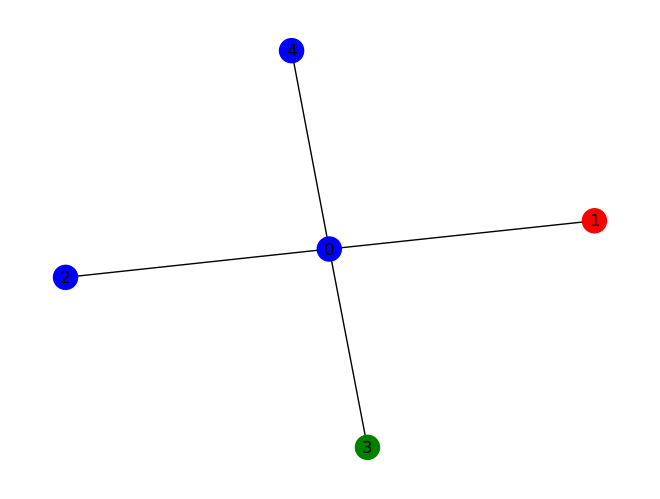

In [8]:
Q_matrix_optimized, optimized_solution_cost, optimized_solution_total_cost = show_parameters_of_solution(optimized_solution, distances_N_stops_normalized, N, p, startNode, endNode, optimized_lambdas)

print("\nQ matrix of optimized solution:")
print(Q_matrix_optimized)

draw_solution_graph(optimized_solution, distances_N_stops_normalized, p, startNode, endNode)


Optimized solution:
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 0]

Optimized solution cost:
0.6381421359519788

Optimized solution total cost:
1.4648954545888326

Validity of the solution:
True


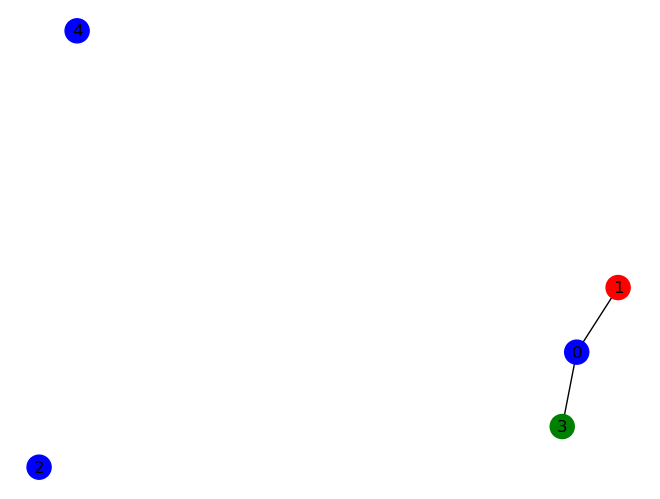

In [9]:
global_minimum = np.array(list(combinations_zipped[0][0]), dtype=int)

show_parameters_of_solution(global_minimum, distances_N_stops_normalized, N, p, startNode, endNode)

draw_solution_graph(global_minimum, distances_N_stops_normalized, p, startNode, endNode)

1 3


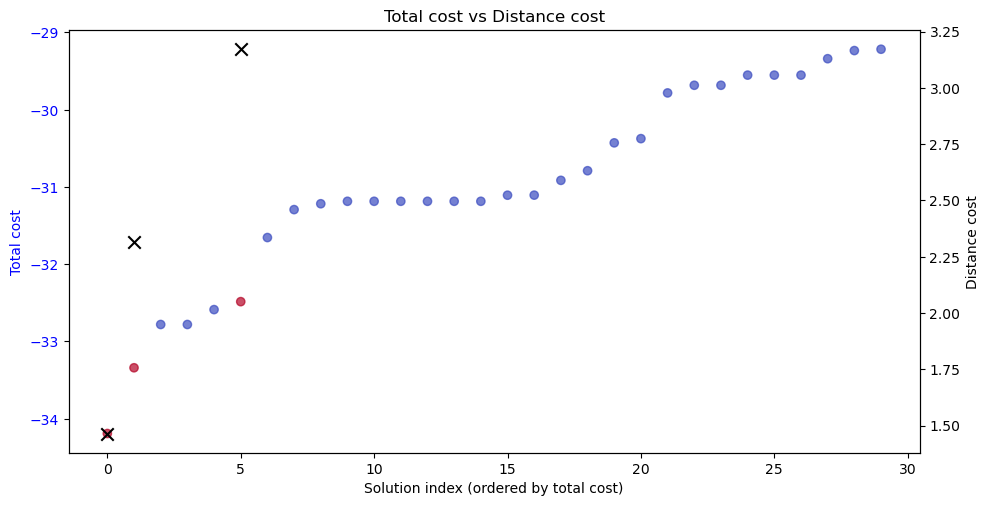

In [10]:
plot_brute_force_minimums(combinations_zipped, N, p, startNode, endNode, rangePlot=rangePlot)
print(startNode, endNode)

In [14]:
# Store the lambdas in a file, to be used in the next iteration.
# We use the naming to store the lambdas in a folder with the same name as the parameters of the problem
# Create the folder data/lambdasOptimized if it does not exist
import os
try:
    os.mkdir("./data/lamdasOptimized")
except:
    pass

np.savetxt("./data/lamdasOptimized/lambdas_N_{}_p_{}_startNode_{}_endNode_{}".format(N, p,startNode,endNode ), optimized_lambdas, delimiter=",")

In [5]:
# Automatized process to generate all combinations of parameters
import glob
for N in range(2, 5):
    for p in range(1, 4):
        L = 1
        all_start_end_combinations = generate_all_start_end_combinations(N, L)

        iterations_process = 5
        scalingFactor = 0.1
        max_iterations_per_process = 1
        num_reads_solver = 1000
        rangePlot = 30

        for startNodes, endNodes in all_start_end_combinations:
            startNode = startNodes[0]
            endNode = endNodes[0]
            sequence = "lambdas_N_{}_p_{}_startNode_{}_endNode_{}_".format(N, p,startNode,endNode)
            if len(glob.glob("./data/lamdasOptimized/{}*".format(sequence))) > 0:
                continue
            else:
                distances_N_stops_normalized = distances_original_matrix[:N,:N]/np.max(distances_original_matrix[:N,:N])

                optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations_per_process, num_reads_solver)

                Q_matrix_optimized,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, optimized_lambdas)

                combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

                violation_of_constraints = count_most_violated_constraints(combinations_zipped, N, p, startNode, endNode, plotRange=rangePlot)

                initial_lambdas = [optimized_lambdas[i]+violation_of_constraints[i] for i in range(5)]

                for i in range(iterations_process-1):
                    optimized_solution, optimized_lambdas = find_optimized_solution(distances_N_stops_normalized, p, N, startNode, endNode, scalingFactor, max_iterations_per_process, num_reads_solver, initial_lambdas)

                    Q_matrix_optimized,_ = create_QUBO_matrix(distances_N_stops_normalized, p, startNode, endNode, optimized_lambdas)

                    combinations_zipped = brute_force_finding(Q_matrix_optimized, distances_N_stops_normalized, p)

                    if i != iterations_process-2:
                        violation_of_constraints = count_most_violated_constraints(combinations_zipped, N, p, startNode, endNode, plotRange=rangePlot)
                        initial_lambdas = [optimized_lambdas[i]+violation_of_constraints[i] for i in range(5)]

                minimmized_solution = np.array(list(combinations_zipped[0][0]), dtype=int)
                if check_solution_return(minimmized_solution, N, p, startNode, endNode):
                    np.savetxt("./data/lamdasOptimized/lambdas_N_{}_p_{}_startNode_{}_endNode_{}_iterations_{}".format(N, p,startNode,endNode, iterations_process ), optimized_lambdas, delimiter=",")

                else:
                    print("Solution not valid for N={}, p={}, startNode={}, endNode={}".format(N, p, startNode, endNode))


Solution not valid for N=2, p=2, startNode=0, endNode=1
Solution not valid for N=2, p=3, startNode=0, endNode=1
Solution not valid for N=3, p=2, startNode=0, endNode=2
Solution not valid for N=3, p=3, startNode=0, endNode=1
Solution not valid for N=3, p=3, startNode=0, endNode=2
Solution not valid for N=3, p=3, startNode=1, endNode=2
